## **Exploratory Data Analysis (EDA)**
------

##### **Goal:** Analzed the cleaned dataset to understand feature distributions, relationships, and patterns related to employee attrition.

##### **Dataset:** HR-Employee-Attrition-Cleaned.csv (1470 employees and 32 features)

In [2]:
# Load libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Set up path for images
images_dir = pathlib.Path('../images')

### **Load Cleaned Dataset**

In [5]:
# load csv file
df = pd.read_csv("../data/HR-Employee-Attrition-Cleaned.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,No,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,1,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Yes,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2909.0,23159.0,1.0,Yes,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0,No,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [6]:
df.shape

(1470, 31)

In [7]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### **Dataset Dimensions**

In [8]:
print(f'Number of employees: {df.shape[0]}')
print(f'Number of variables: {df.shape[1]}')

Number of employees: 1470
Number of variables: 31


#### **Variable Types**

In [9]:
# Fix Attrition data type
df['Attrition'] = df['Attrition'].astype('object')

In [10]:
# Print categorical and numeric variables
cat_cols = df.select_dtypes(include = ['object']).columns
print(f'Number of categorical variables: {len(cat_cols)}')
print(f'\nList of categorical variables: {cat_cols}')

num_cols = [c for c in df if c not in cat_cols]
print(f'\nNumber of numeric variables: {len(num_cols)}')
print(f'\nList of numeric variables: {num_cols}')

Number of categorical variables: 8

List of categorical variables: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Number of numeric variables: 23

List of numeric variables: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### **Missing Data**

In [11]:
# Confirm no missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### **Cleaned Data Overview**

1470 employees and 32 variables.

**8 Categorical** variables: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime

**24 Numeric** variables: Age, DailyRate, DistanceFromHome, Education, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

There are no missing values.

### **Univariate Analysis**

#### **Outcome/Target**

In [12]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [13]:
print(df['Attrition'].value_counts(normalize=True))
percentage_stayed = df['Attrition'].value_counts(normalize=True)[0].round(3) * 100
percentage_left = df['Attrition'].value_counts(normalize=True)[1].round(3) * 100

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


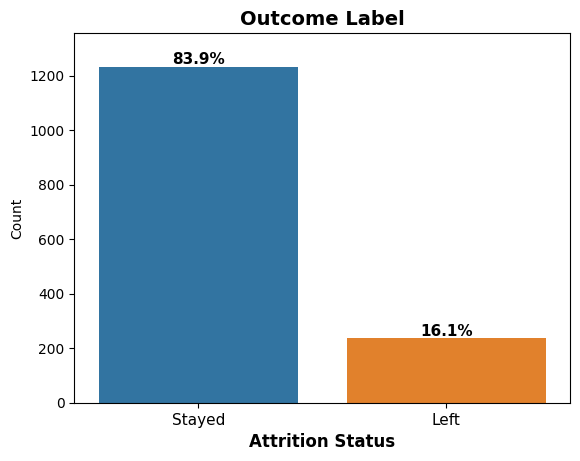

In [14]:
sns.countplot(data = df, x = 'Attrition', hue = 'Attrition')
plt.title("Outcome Label", fontsize=14, fontweight='bold')
plt.xticks([0,1], ["Stayed", "Left"], fontsize=11)
plt.xlabel("Attrition Status", fontsize=12, fontweight='bold')
plt.ylabel("Count")
plt.ylim(0, df['Attrition'].value_counts().max() * 1.10)
plt.text(0, df['Attrition'].value_counts()[0] + 10, f'{percentage_stayed:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.text(1, df['Attrition'].value_counts()[1] + 10, f'{percentage_left:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.legend().set_visible(False)

plt.savefig(images_dir / 'outcome_label_barchart.png', dpi=300, bbox_inches="tight")

#### **Categorical Variables**

In [15]:
# Create list of categorical variables excluding target variable (Attrition)
cat_cols_without_target = [c for c in cat_cols if c not in 'Attrition']
cat_cols_without_target

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

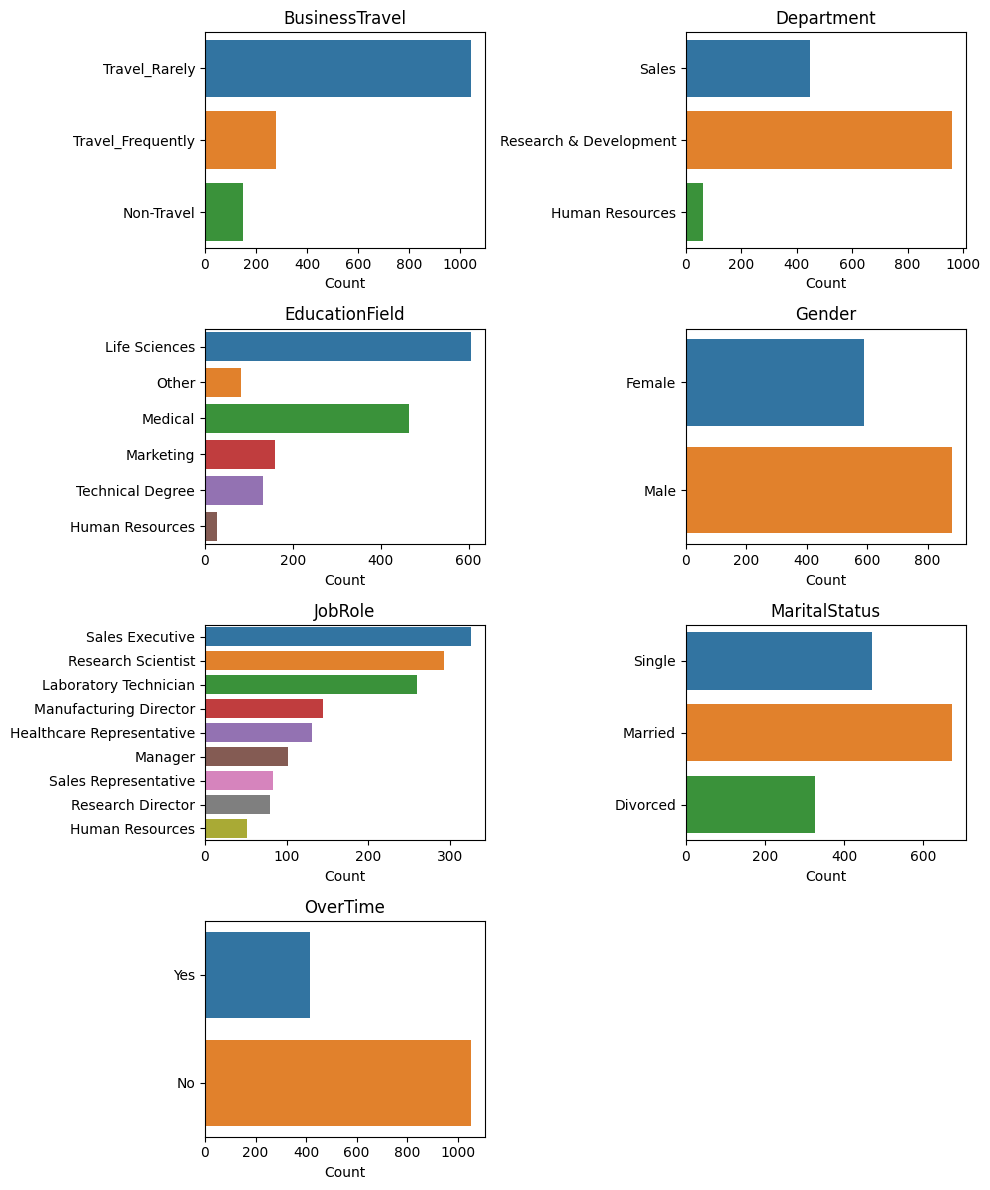

In [16]:
# Make Bar charts for categorical variables
fig, axes = plt.subplots(4, 2, figsize =(10,12))

for ax, col in zip(axes.flatten(), cat_cols_without_target):
    sns.countplot(y=col, data=df, ax=ax, hue=col)
    ax.set_title(col)
    ax.set_ylabel("")
    ax.set_xlabel("Count")

fig.delaxes(axes[3][1])

plt.tight_layout()

plt.savefig('../images/categorical_distributions.png', dpi=300, bbox_inches='tight')

#### **Numeric Variables**

##### Histogram of numeric variables

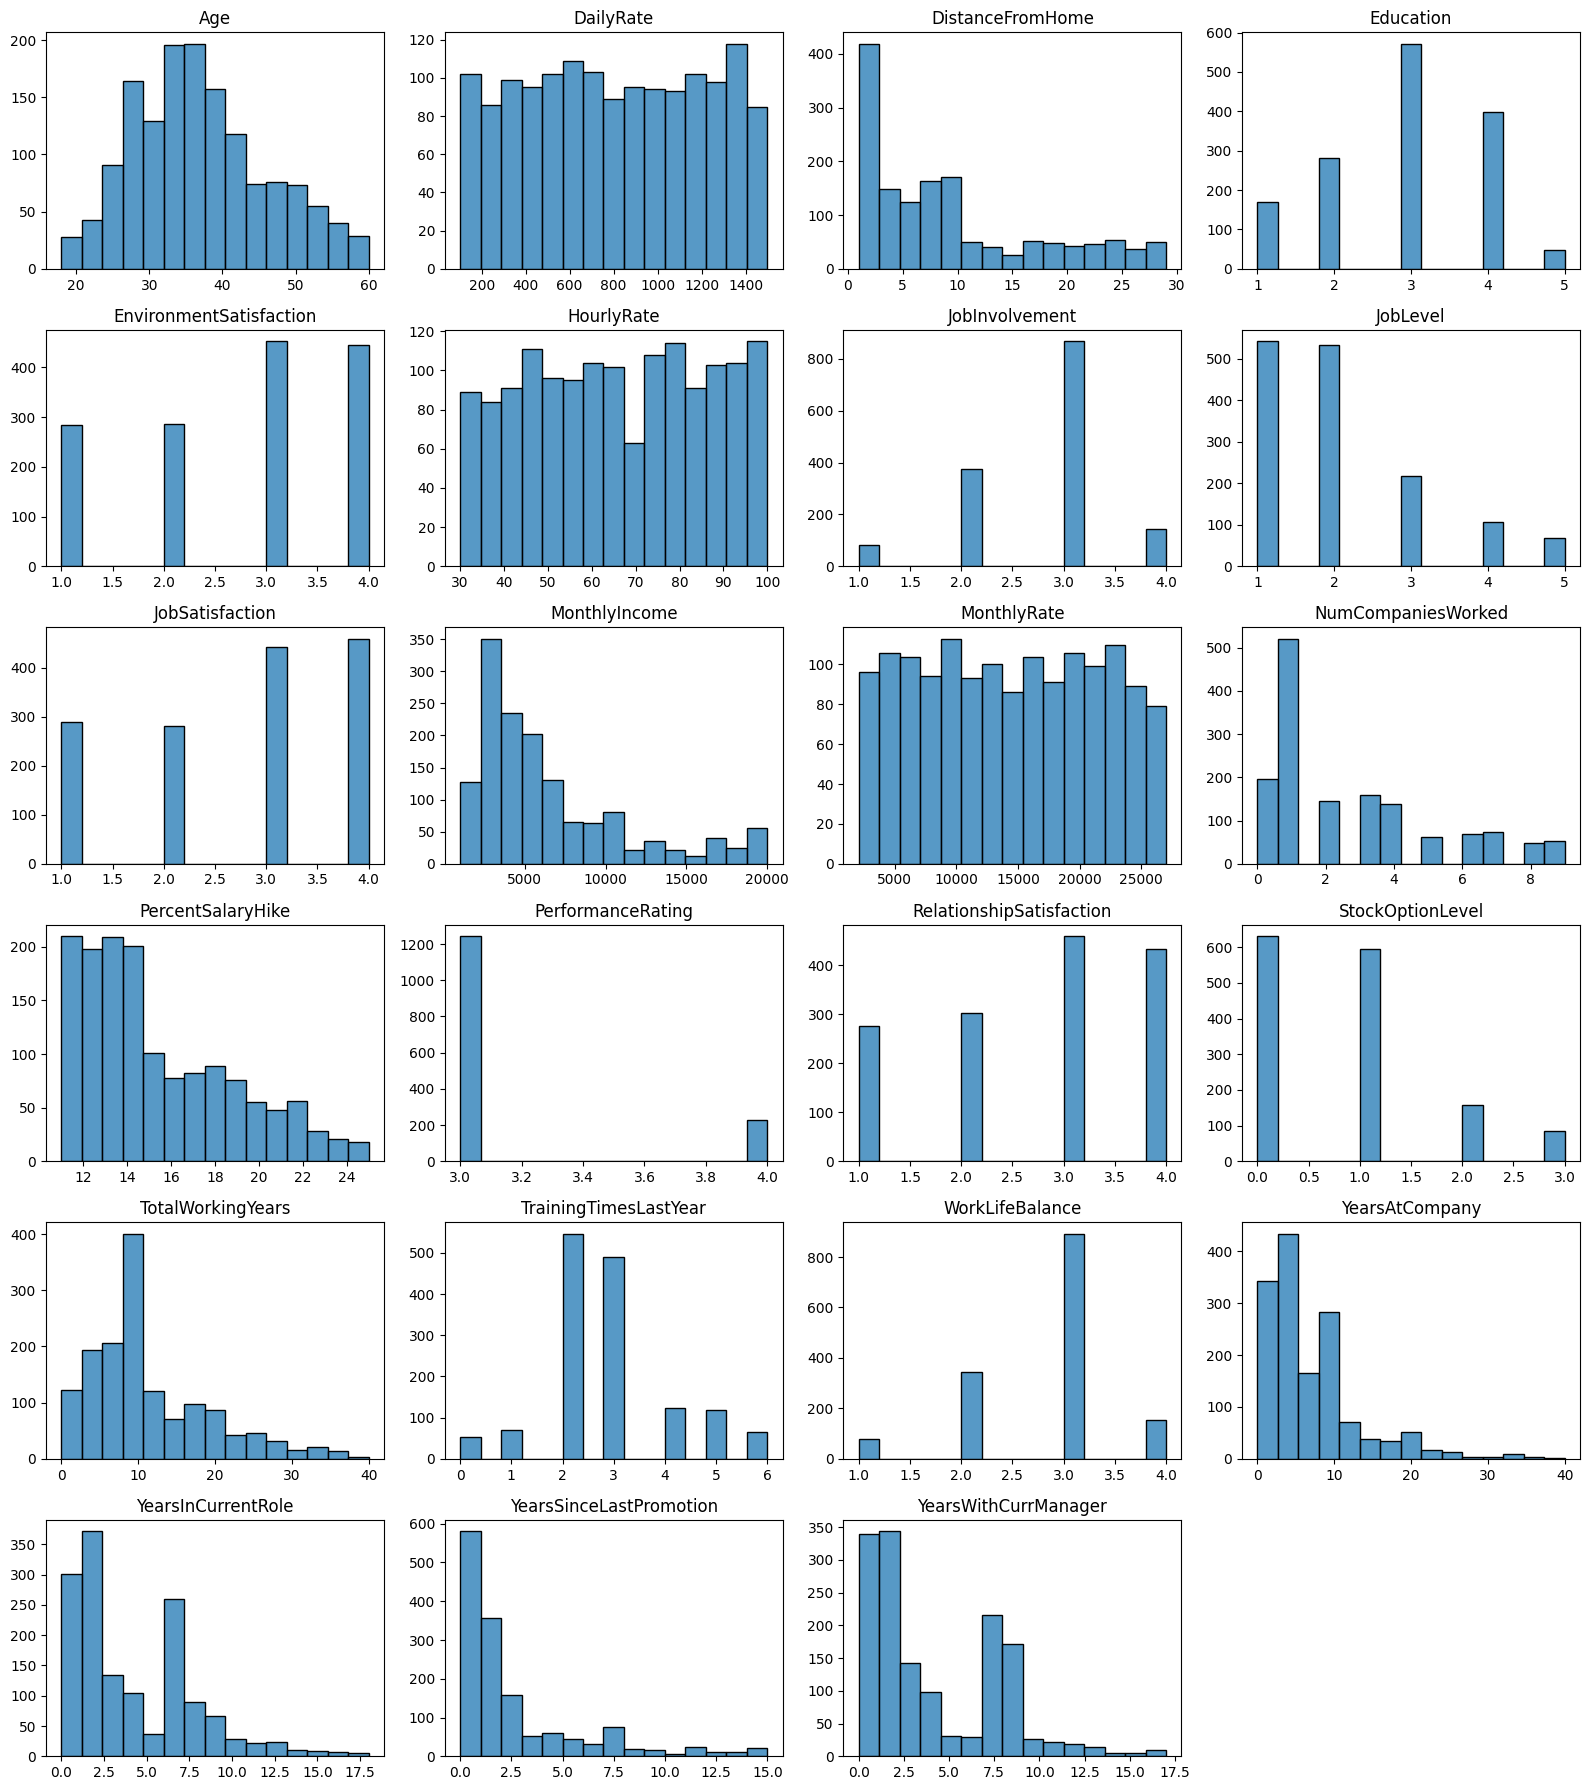

In [17]:
# Create histogram for all numeric variables
n = len(num_cols)
# Want 4 plots per row
cols = 4
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))

axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(x=df[col], ax=ax, bins=15)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('../images/numeric_distributions.png', dpi=300, bbox_inches='tight')

Skewness Evaluation of Continuous Numeric Variables

In [18]:
# Create list of continuous numeric variables
cont_num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [19]:
# Calculate Pearson'a median skewness and store in dictionary
print("Pearson's median skewness:")
skewness_dict = {}
for col in cont_num_cols:
    skewness = (3* (df[col].mean() - df[col].median())) / df[col].std()
    skewness_dict[col] = float(skewness.round(3))
skewness_dict

Pearson's median skewness:


{'Age': 0.303,
 'DailyRate': 0.004,
 'DistanceFromHome': 0.811,
 'HourlyRate': -0.016,
 'MonthlyIncome': 1.009,
 'MonthlyRate': 0.033,
 'NumCompaniesWorked': 0.832,
 'PercentSalaryHike': 0.991,
 'TotalWorkingYears': 0.493,
 'TrainingTimesLastYear': -0.467,
 'YearsAtCompany': 0.983,
 'YearsInCurrentRole': 1.018,
 'YearsSinceLastPromotion': 1.106,
 'YearsWithCurrManager': 0.944}

In [20]:
# Create dataframe 
skewness_df = pd.DataFrame.from_dict(skewness_dict, orient = 'index', columns=['Skewness'])
# Create new column for absolute skewness
skewness_df['Absolute_skewness'] = skewness_df['Skewness'].abs()
# Sort by absolute skewness
skewness_df = skewness_df.sort_values('Absolute_skewness', ascending=False)
# Drop absolute skewness column
skewness_df = skewness_df.drop('Absolute_skewness', axis=1)
skewness_df

,Skewness
YearsSinceLastPromotion,1.106
YearsInCurrentRole,1.018
MonthlyIncome,1.009
PercentSalaryHike,0.991
YearsAtCompany,0.983
YearsWithCurrManager,0.944
NumCompaniesWorked,0.832
DistanceFromHome,0.811
TotalWorkingYears,0.493
TrainingTimesLastYear,-0.467


In [21]:
# Filter for variables with moderate-high skewness
mod_high_skew = skewness_df[skewness_df['Skewness'] >= 0.5]
mod_high_skew

,Skewness
YearsSinceLastPromotion,1.106
YearsInCurrentRole,1.018
MonthlyIncome,1.009
PercentSalaryHike,0.991
YearsAtCompany,0.983
YearsWithCurrManager,0.944
NumCompaniesWorked,0.832
DistanceFromHome,0.811


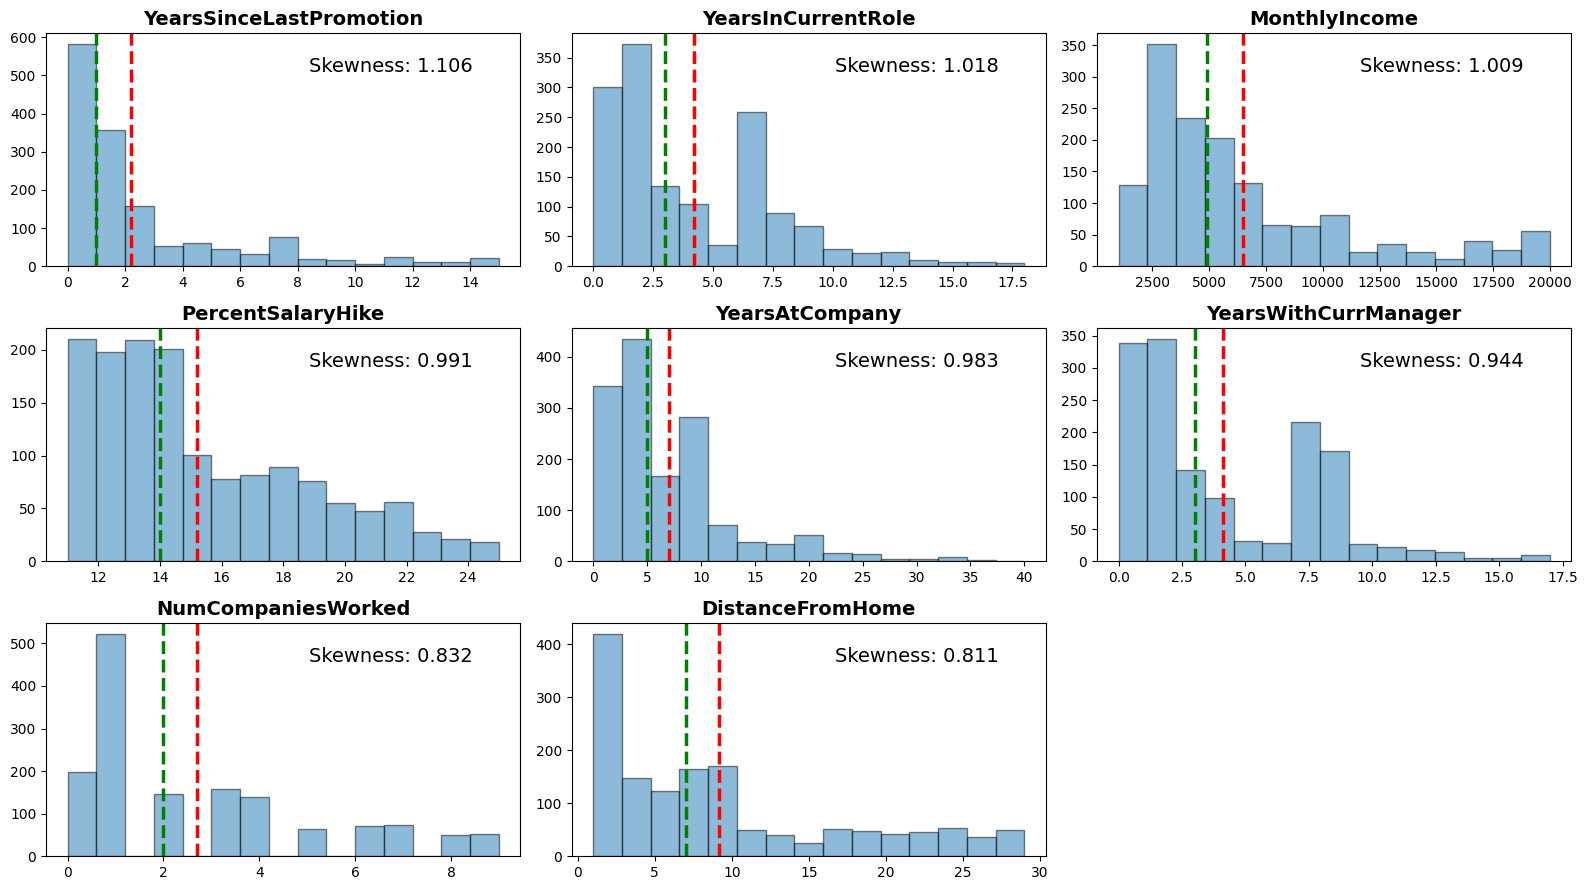

In [22]:
# Create histograms of the variables with mild to moderate skews, show mean and median
# Create a list of variables that have mild to moderate skew
mod_high_skew_cols = mod_high_skew.index.to_list()

# Create histograms
n = len(mod_high_skew_cols)
cols = 3
rows = math.ceil(n/cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))
axes = axes.flatten()

for ax, col in zip(axes, mod_high_skew_cols):
    ax.hist(x = df[col], bins=15, alpha=0.5, edgecolor='black')
    ax.set_title(col, fontsize=14, weight='bold')
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2.5)
    ax.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2.5)
    ax.text(0.9,0.9,s = f'Skewness: {mod_high_skew.loc[col, "Skewness"]:.3f}', fontsize = 14, color = "black", horizontalalignment="right", verticalalignment="top",
           transform=ax.transAxes)

# Remove empty plot
for ax in axes[len(mod_high_skew_cols):]:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('../images/skewness_numeric_histograms.png', dpi=300, bbox_inches='tight')

Will try transforming variables with moderate to high skewness.

Log Transformation

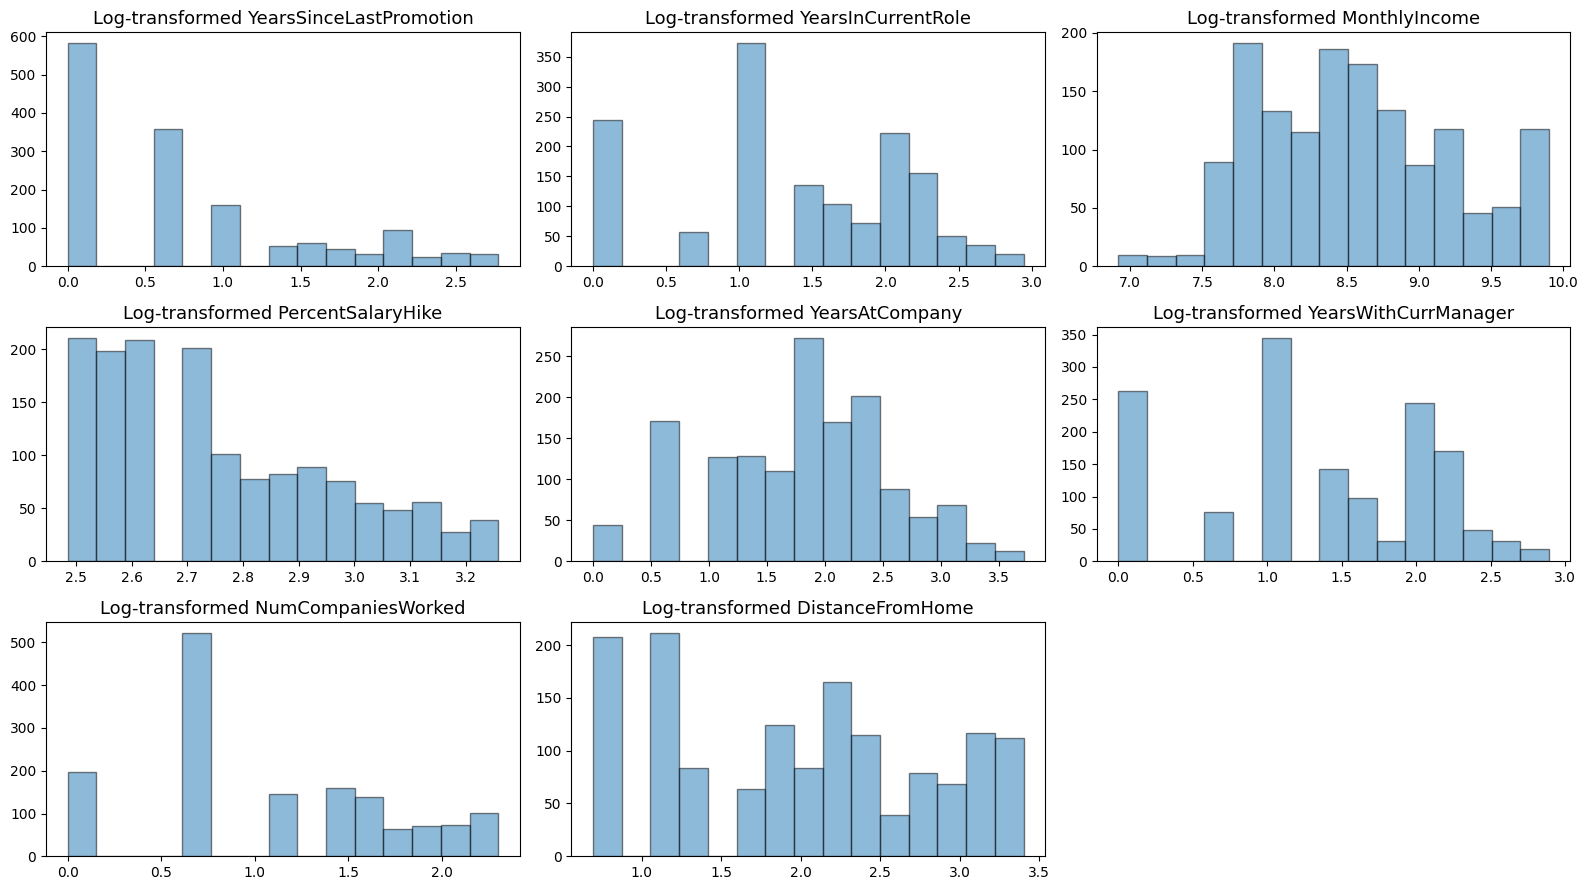

In [23]:
# Show histogram after log transformation of skewed variables
n = len(mod_high_skew_cols)
cols=3
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))

axes = axes.flatten()

for ax, col in zip(axes, mod_high_skew_cols):
    data = df[col]
    data_log = np.log1p(data) # handles any zero values
    ax.hist(data_log, bins=15, alpha=0.5, edgecolor="black")
    ax.set_title(f"Log-transformed {col}", fontsize=13)
    ax.set_xlabel("")

for ax in axes[len(mod_high_skew_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Yeo-Johnson Transformation - handles zero values

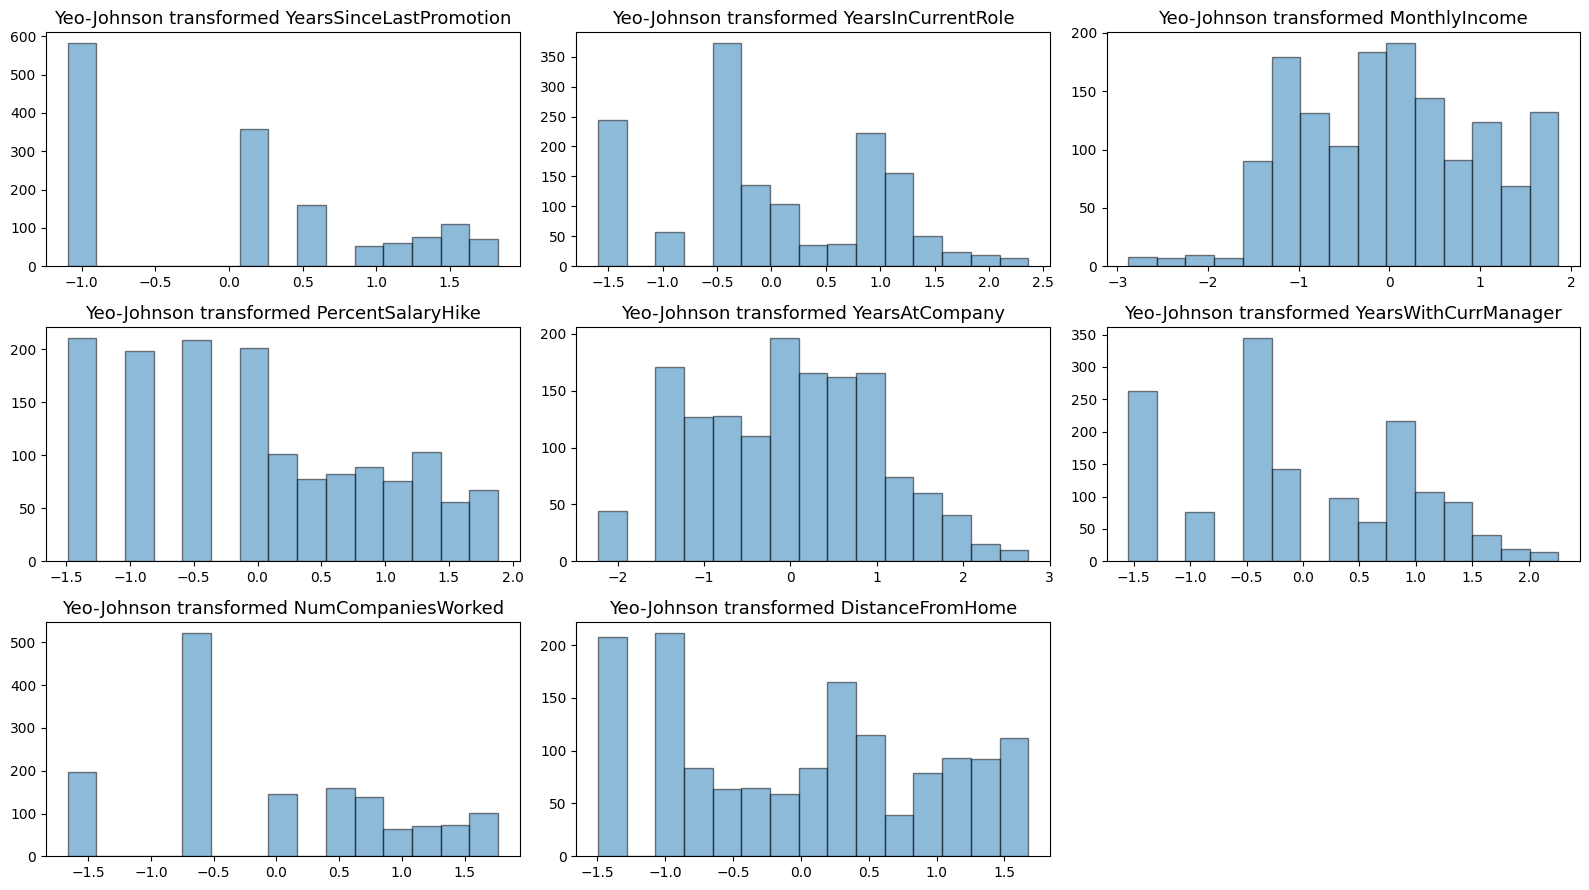

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

n = len(mod_high_skew_cols)
cols=3
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))

axes = axes.flatten()

for ax, col in zip(axes, mod_high_skew_cols):
    data = df[col].dropna().values.reshape(-1,1)
    data_yj = pt.fit_transform(data).flatten()
 
    ax.hist(data_yj, bins=15, alpha=0.5, edgecolor="black")
    ax.set_title(f"Yeo-Johnson transformed {col}", fontsize=13)
    ax.set_xlabel("")

for ax in axes[len(mod_high_skew_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

#### **Outlier Detection**

In [25]:
# Create a function to look at outliers for variables that have outliers using IQR method
def upper_outliers(df, num_cols):
    outlier_cols = []
    for col in num_cols:
        # calculate the IQR and upper outlier boundary for each column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3-q1
        upper = q3 +1.5*IQR

        is_outlier = df[col] > upper
        # check if there are any outliers in the column
        if is_outlier.any():
            outlier_cols.append(col)
            top = df.loc[is_outlier].sort_values(by=col, ascending=False).head()
    return outlier_cols

outlier_cols = upper_outliers(df, num_cols)
print("Columns with outliers: ", outlier_cols)

Columns with outliers:  ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


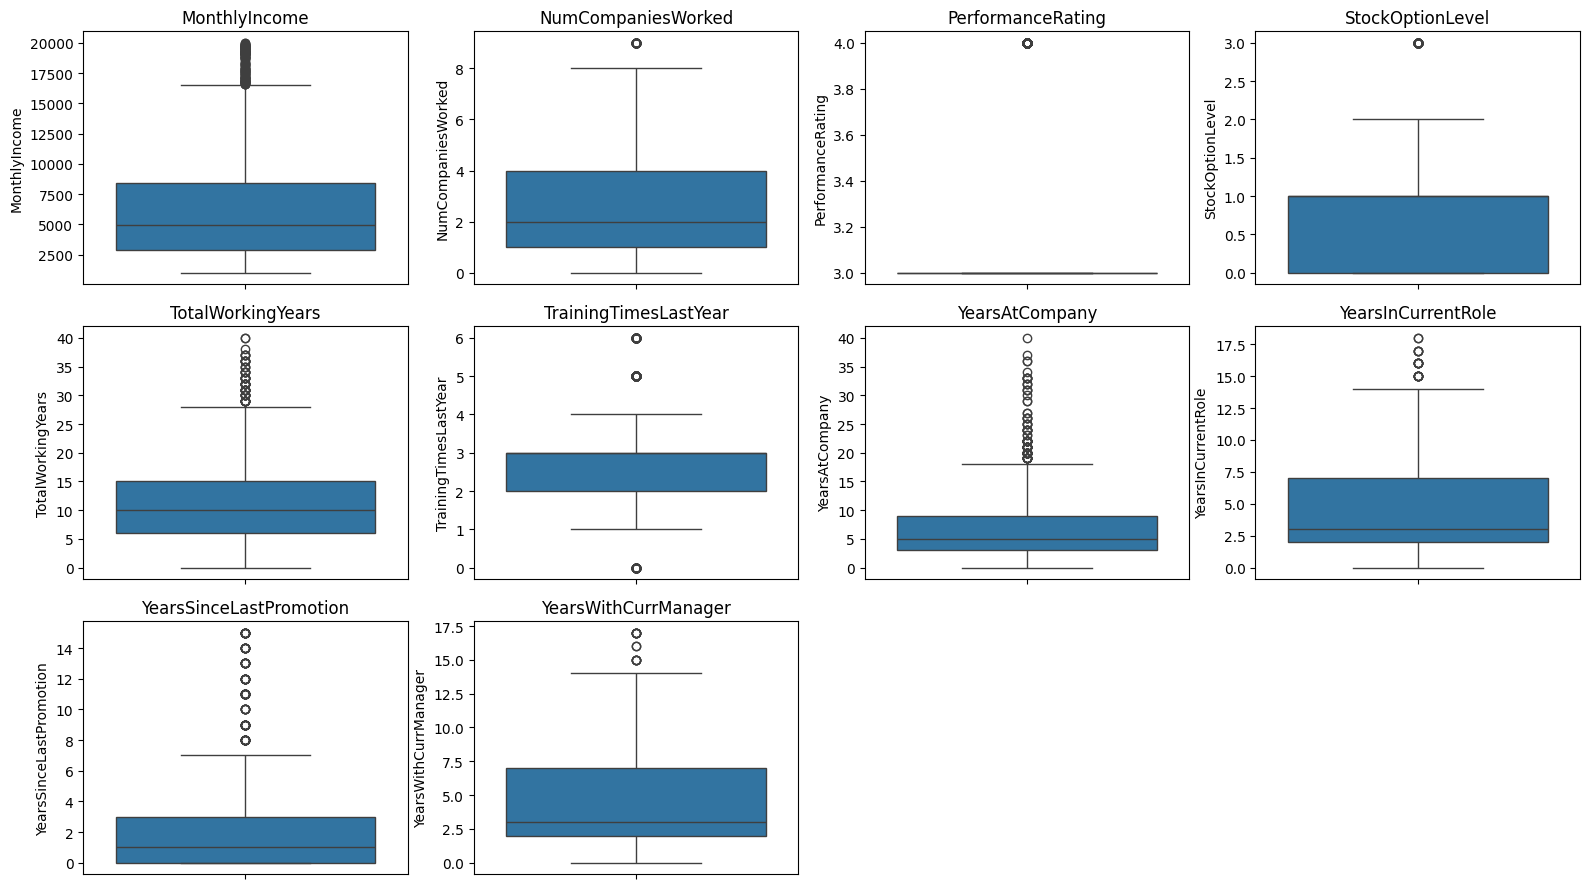

In [26]:
# Show boxplots for only the numeric variables with outliers
n = len(outlier_cols)
# want 4 per row
cols = 4
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))

axes = axes.flatten()

for ax, col in zip(axes, outlier_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[len(outlier_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

#### **Univariate Analysis Summary**

The **outcome/target variable** exhibits a significant class imbalance with only 16.1% attrition. Will need to consider mitigation strategies including:
- SMOTE
- class weights
- stratified sampling

**Categorical Variables:** 
- Most employees rarely travel, work in R&D, are married, and don't work overtime. The workforce skews male, with Sales Executive being the most common role.

**Numeric Variables:**
- Pearson' median skewness identified 8 variables with moderate-to-high skewness (skewness > 0.5): YearsSinceLastPromotion, YearsInCurrentRole, MonthlyIncome, PercentSalaryHike, YearsAtCompany, YearsWithCurrManager, NumCompaniesWorked, and DistanceFromHome. Two different transformations were performed, Log and Yeo-Johnson. Log transformation improved skewness and will be used for the skewed variables in the modeling phase.
- Outliers were evaluated using the IQR methods. Variables with flagged outliers were investigated and all values appear plausible, representing likely variation rather than data quality issues. 

### **Bivariate Analysis**

#### **Categorical versus Categorical (Outcome)**

List of categorical variables.

In [27]:
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [28]:
# Create list of categorical variables excluding attrition for plotting
cat_predictors = [c for c in cat_cols if c != 'Attrition']
cat_predictors

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Stacked Bar Chart

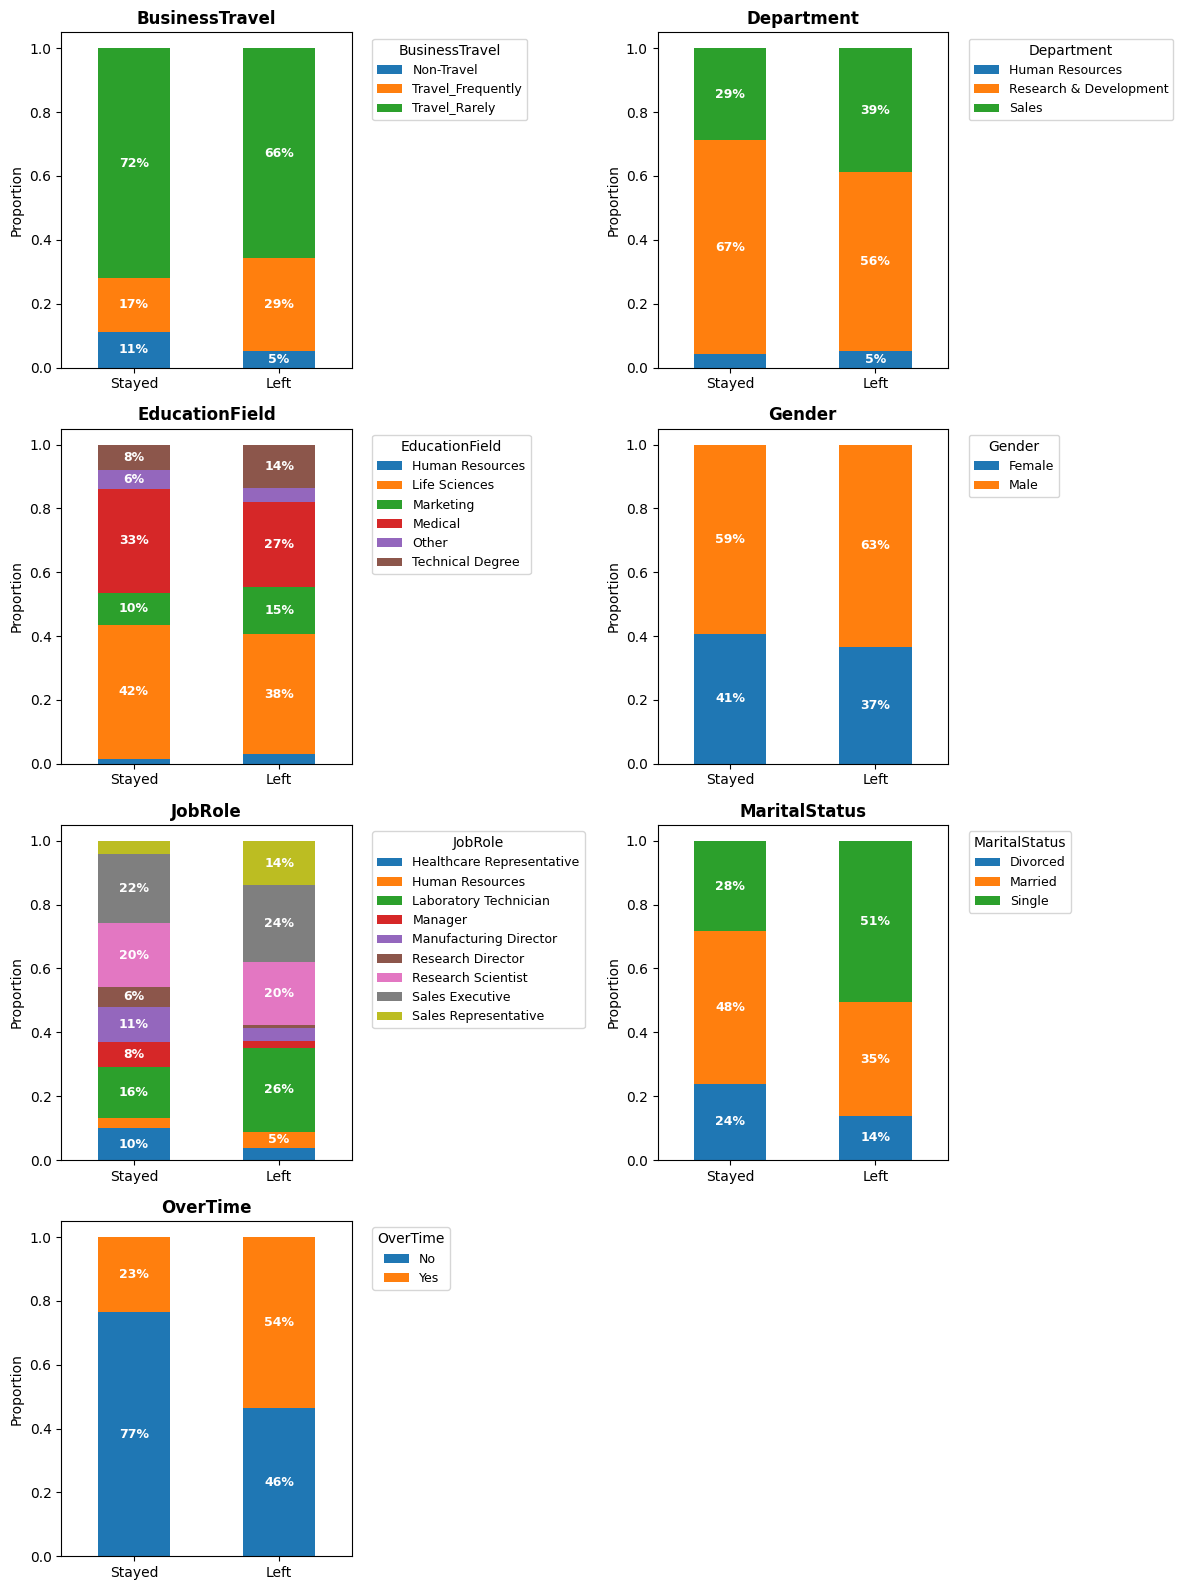

In [29]:
n = len(cat_predictors)
cols = 2
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, cat_predictors):
    df_grouped = df.groupby('Attrition')[col].value_counts(normalize=True).unstack(col).fillna(0)
    df_grouped.plot.bar(stacked=True, ax=ax)
    
    ax.set_title(col, fontsize=12, weight='bold')
    ax.set_ylabel("Proportion", fontsize=10)
    ax.set_xlabel("")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Stayed', 'Left'], rotation=0)
    
    # Create legend
    ax.legend(
        title=col,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        frameon=True,
        fontsize=9
    )
    
    # Fixed percentage labels
    for ix, row in df_grouped.iterrows():
        cumulative = 0
        for cat_value, proportion in row.items():
            if proportion > 0.05:  
                ax.text(
                    ix,
                    cumulative + proportion/2,
                    f'{proportion*100:.0f}%',
                    va="center",
                    ha="center",
                    fontsize=9,
                    color="white",
                    weight='bold'
                )
            cumulative += proportion

for ax in axes[len(cat_predictors):]:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('../images/stacked_barchart_categorical.png', dpi=300, bbox_inches='tight')

Chi-square Test - Expected cell counts checked

In [30]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in cat_predictors:
    # Create contigency table
    contigency_table = pd.crosstab(df[col], df['Attrition'])
    # Perfom chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contigency_table)
    # Check if expected cell counts over 5
    min_expected = expected.min()

    # Add results to dictionary
    chi_results[col] = {
        'chi2': round(chi2, 3),
        'p_value': round(p_value, 4),
        'min_expected_count': round(min_expected, 2),
        'valid': min_expected >= 5} # Flag if expected cell count not 5 or above
        
chi_df = pd.DataFrame(chi_results).T
chi_df = chi_df.sort_values('p_value')
chi_df

,chi2,p_value,min_expected_count,valid
BusinessTravel,24.182,0.0,24.18,True
JobRole,86.19,0.0,8.38,True
MaritalStatus,46.164,0.0,52.72,True
OverTime,87.564,0.0,67.07,True
Department,10.796,0.0045,10.16,True
EducationField,16.025,0.0068,4.35,False
Gender,1.117,0.2906,94.8,True


#### **Numeric versus Categorical (Outcome)**

In [31]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Boxplots of numeric variables by Attrition

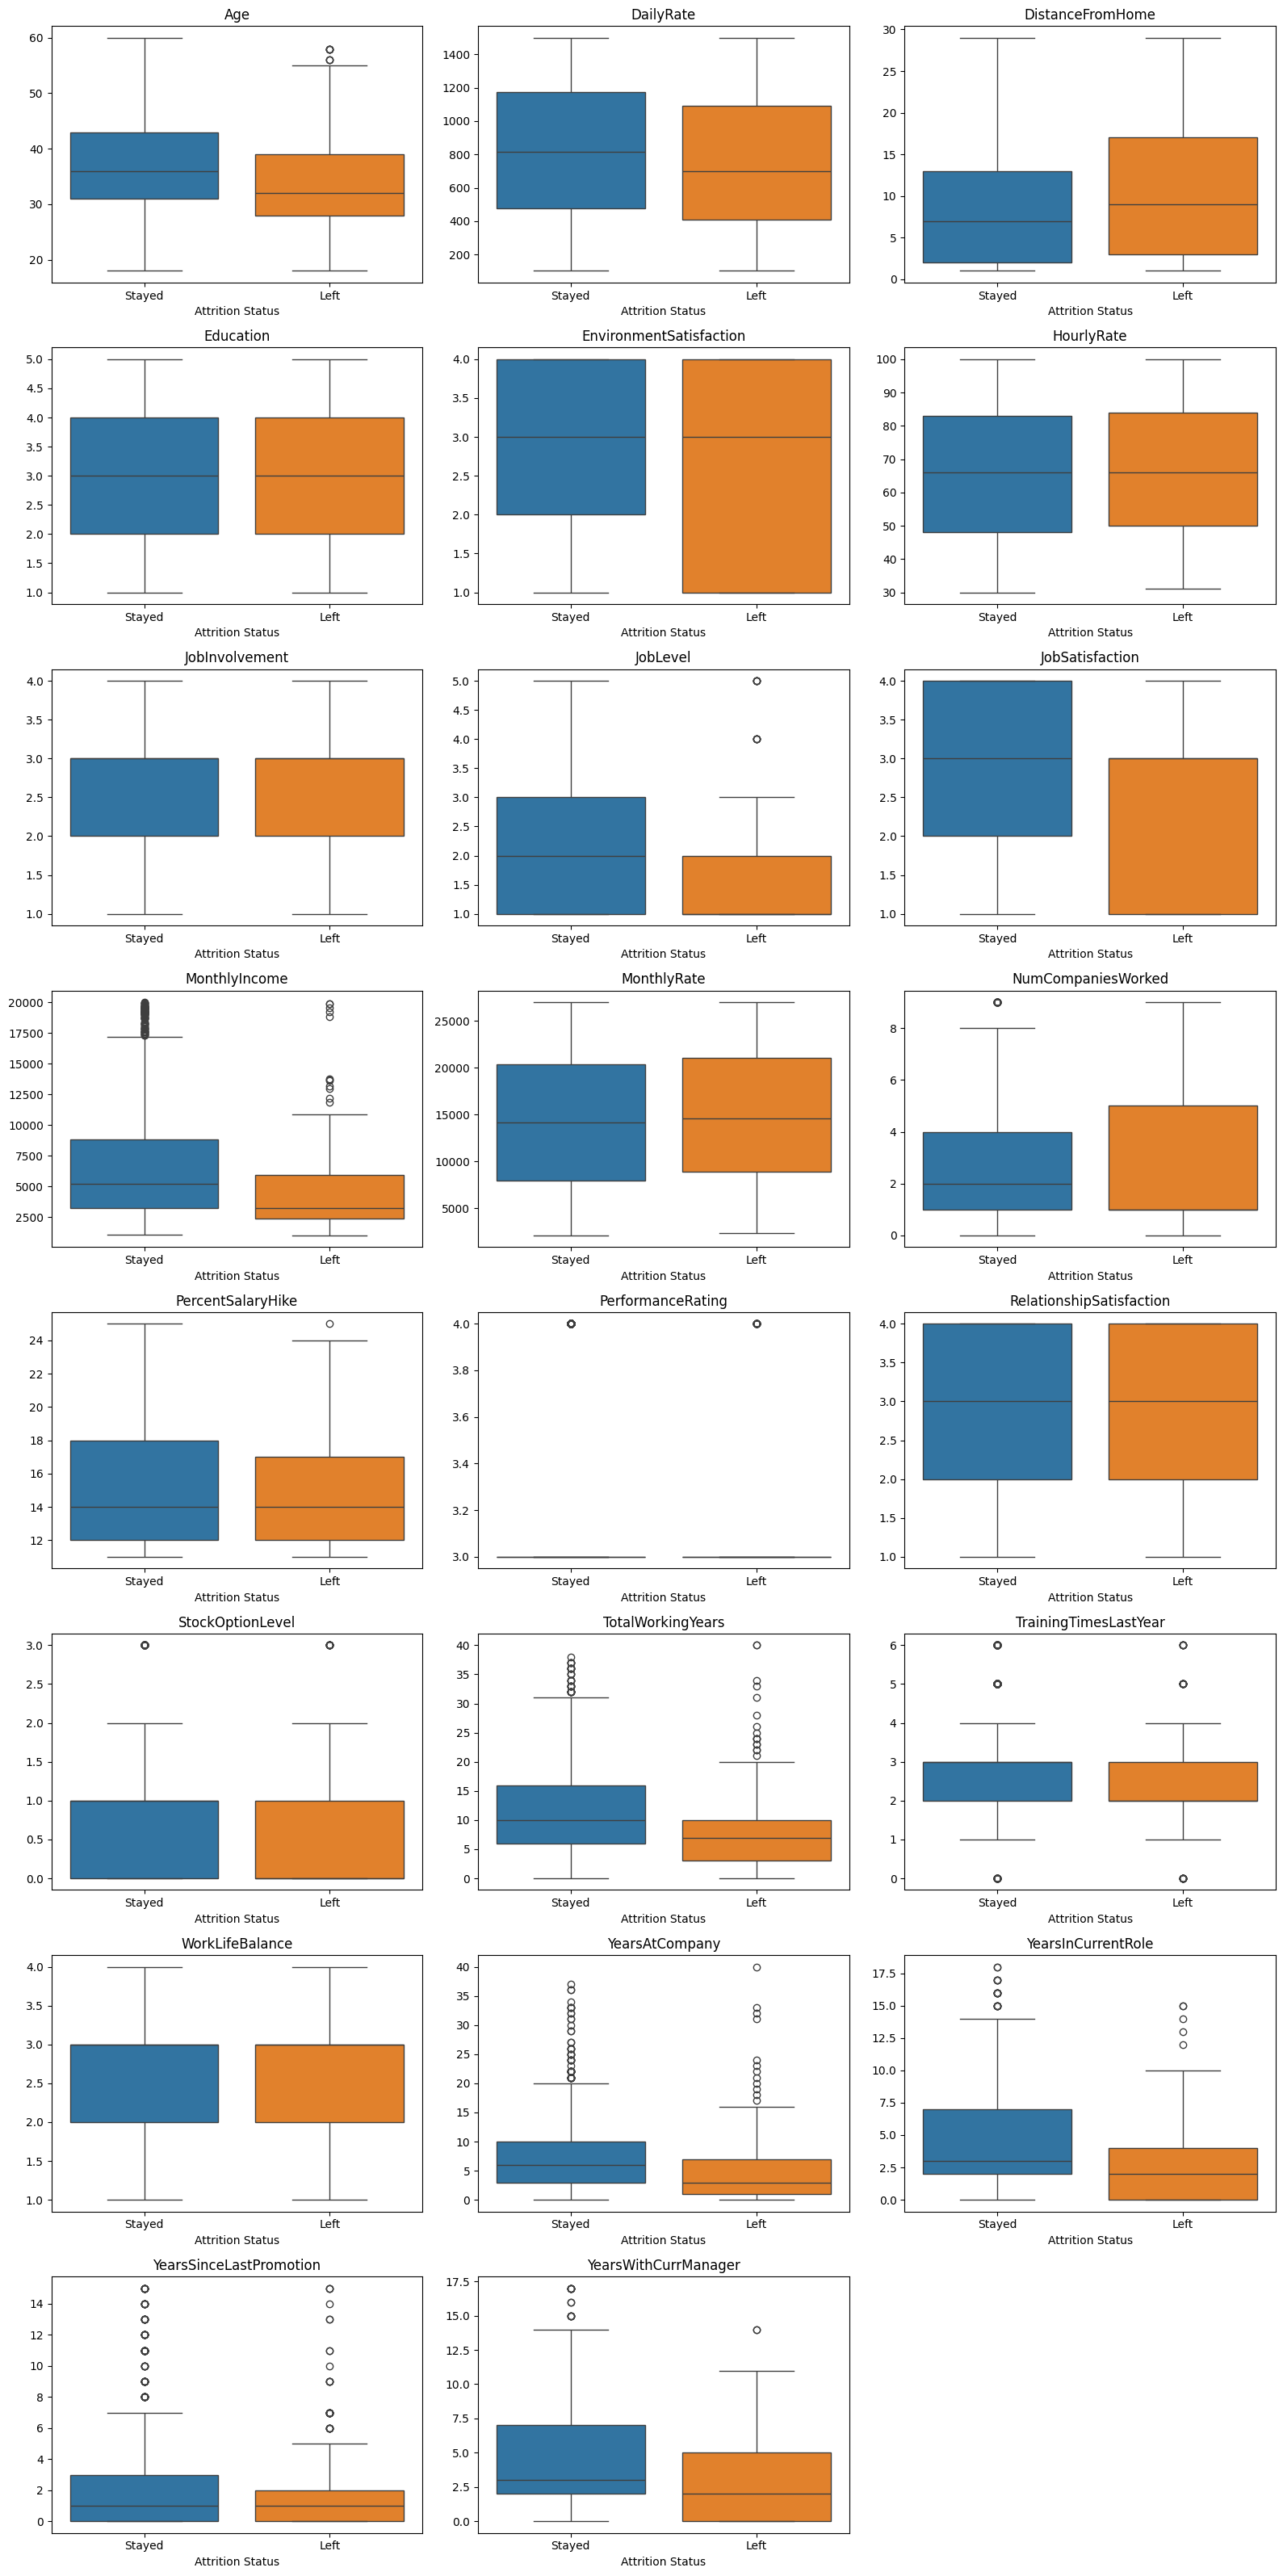

In [32]:
n=len(num_cols)
# want 3 per row
cols = 3
rows = math.ceil(n/cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows*4))

axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=df, x = 'Attrition', y=col, ax=ax, hue='Attrition')
    ax.set_title(col)
    ax.set_ylabel("")
    ax.set_xlabel("Attrition Status")
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Stayed', 'Left'])
    ax.legend_.remove()

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Mann-Whitney U (nonparametric) - ordinal and continuous data with non-normal distributions.

In [33]:
from scipy.stats import mannwhitneyu

results = []
for col in num_cols:
    group0 = df.loc[df['Attrition']==0, col].dropna()
    group1 = df.loc[df['Attrition']==1, col].dropna()
    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
    results.append({'Variable': col, 'U-stat': stat, 'p-value': p})

mannwhitney_df = pd.DataFrame(results).sort_values('p-value')
#mannwhitney_df['p-value'] = mannwhitney_df['p-value'].apply(lambda x: f'{x:.6f}')
mannwhitney_df

,Variable,U-stat,p-value
16,TotalWorkingYears,191654.0,2.399569e-14
9,MonthlyIncome,191600.5,2.950831e-14
19,YearsAtCompany,189639.0,2.916191e-13
7,JobLevel,187491.5,2.956987e-13
20,YearsInCurrentRole,187007.0,4.429560e-12
22,YearsWithCurrManager,185859.5,1.806754e-11
15,StockOptionLevel,182610.0,4.013375e-11
0,Age,185362.0,5.304342e-11
6,JobInvolvement,170264.0,4.651927e-06
8,JobSatisfaction,168858.5,7.957918e-05


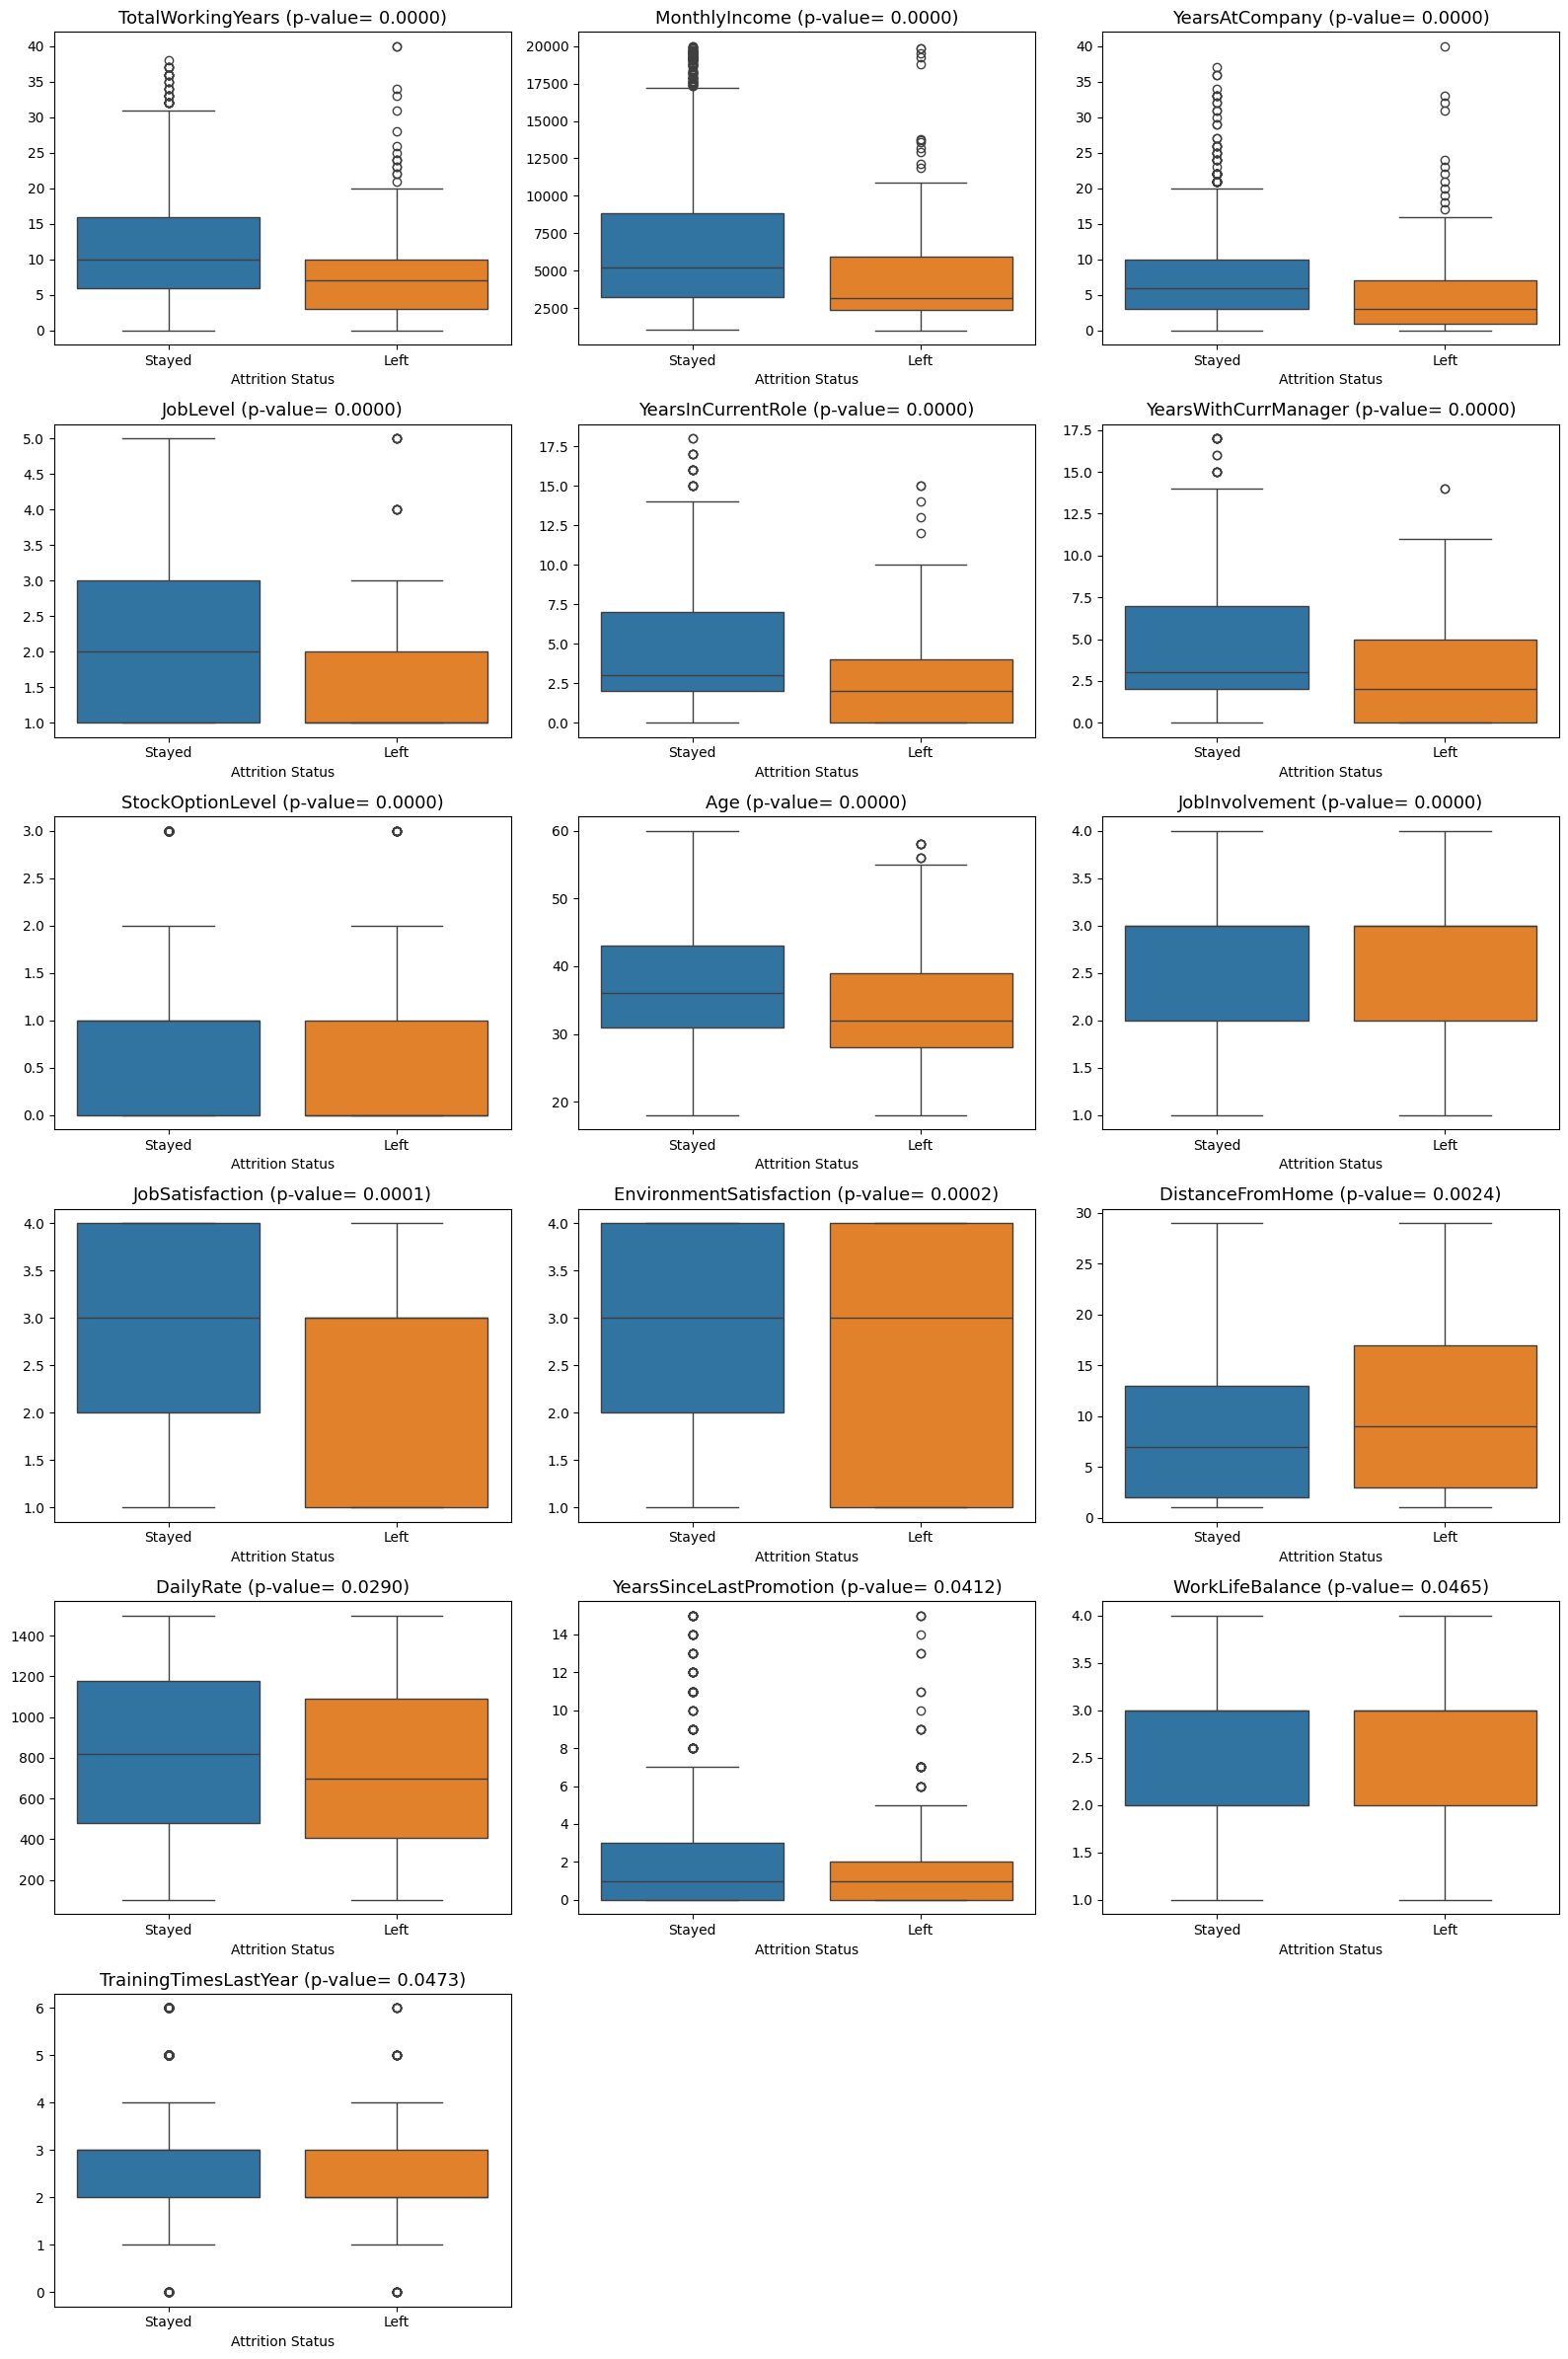

In [34]:
# Show boxplots with variables that are significantly different
# List of variables that have p-value < 0.05
sig_vars = mannwhitney_df.loc[mannwhitney_df['p-value'] < 0.05, 'Variable'].tolist()

# Plot boxplots
n = len(sig_vars)
cols = 3
rows = math.ceil(n/cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows*4))

axes = axes.flatten()

for ax, var in zip(axes, sig_vars):
    sns.boxplot(data=df, x = 'Attrition', y=var, ax=ax, hue='Attrition')
    # get p-values
    p = mannwhitney_df.loc[mannwhitney_df['Variable'] == var, 'p-value'].values[0]
    ax.set_title(f'{var} (p-value= {p:.4f})', fontsize=13)
    ax.set_ylabel("")
    ax.set_xlabel("Attrition Status")
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Stayed', 'Left'])
    ax.legend_.remove()

for ax in axes[len(sig_vars):]:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('../images/boxplots_numeric_attrition.png', dpi=300, bbox_inches='tight')

Boxplots of statistically significant Continuous Variables.